# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [268]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Create two new dataframes
north_df=pd.read_csv('NorthCallCenter.csv')
south_df=pd.read_csv('SouthCallCenter.csv')


In [269]:
north_df.shape

north_df.head(10)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
5,5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1
6,6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1
7,7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1
8,8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,4,1
9,9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,4,1


In [270]:
south_df.shape

south_df.head(10)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
5,5,South,Sales Support,1:00 PM,Incoming,D,Karl,NO,0,0,9,1,1.0,4,1
6,6,South,Product Support,11:00 AM,Incoming,C,Sandy,NO,0,0,8,1,1.0,2,1
7,7,South,Product Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,1,1.0,3,1
8,8,South,Product Support,2:00 PM,Incoming,D,Randy,NO,0,0,11,2,1.0,4,1
9,9,South,Product Support,3:00 PM,Incoming,D,George,NO,0,0,8,3,1.0,4,1


## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [271]:
# EDA Question 1A solution below:
#Code Used:
n_reps=north_df['Rep ID'].nunique()

print('unique representatives of north branch',n_reps)


unique representatives of north branch 9


#### EDA Question 1B:  How many reps are in the South branch?  

In [272]:
# EDA Question 1B solution Below:
#Code Used:
s_reps= south_df['Rep ID'].nunique()

print('unique representatives of south branch',s_reps)


unique representatives of south branch 11


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [273]:
# EDA Question 2A solution Below:
#Code Used:
north_df[['Busy Minutes','Not Ready Minutes','Incoming Wait Time','During Call Wait Time']].agg('mean')


Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [274]:
# EDA Question 2B solution Below:
#Code Used:
south_df[['Busy Minutes','Not Ready Minutes','Incoming Wait Time','During Call Wait Time']].agg('mean').round(2)

Busy Minutes             10.05
Not Ready Minutes         1.91
Incoming Wait Time        3.00
During Call Wait Time     3.08
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [275]:
# # Code Used:
# n_tb_gpby=north_df.groupby('Time Block')

# # df.agg({'A' : ['sum', 'min'], 'B' : ['min', 'max']})

# no_of_calls_north =n_tb_gpby.aggregate({'Calls':'sum'})

# print('no of calls for north branch',no_of_calls_north)

# s_tb_gpby=south_df.groupby('Time Block')

# no_of_calls_south =s_tb_gpby.aggregate({'Calls':'sum'})

# print('no of calls for south branch',no_of_calls_south)

# total_no_of_calls=no_of_calls_north+no_of_calls_south

# print('no.of calls for south and north and branch',total_no_of_calls)

In [276]:
n_tb_gpby=north_df.groupby('Time Block')

no_of_calls_north =n_tb_gpby.aggregate({'Calls':'sum'})

print('no of calls for north branch',no_of_calls_north)

no of calls for north branch             Calls
Time Block       
10:00 AM       43
11:00 AM       25
12:00 PM       45
1:00 PM        17
2:00 PM        35
3:00 PM        30
4:00 PM        28
5:00 PM        17
9:00 AM         5


In [277]:
s_tb_gpby=south_df.groupby('Time Block')

no_of_calls_south =s_tb_gpby.aggregate({'Calls':'sum'})

print('no of calls for south branch',no_of_calls_south)

no of calls for south branch             Calls
Time Block       
10:00 AM       56
11:00 AM       31
12:00 PM       75
1:00 PM        23
2:00 PM        30
3:00 PM        43
4:00 PM        25
5:00 PM        26
9:00 AM         5


In [278]:
total_no_of_calls=no_of_calls_north+no_of_calls_south

print('no.of calls for south and north and branch',total_no_of_calls)

no.of calls for south and north and branch             Calls
Time Block       
10:00 AM       99
11:00 AM       56
12:00 PM      120
1:00 PM        40
2:00 PM        65
3:00 PM        73
4:00 PM        53
5:00 PM        43
9:00 AM        10


In [279]:
e = pd.concat([north_df['Time Block'],south_df['Time Block']])
e.value_counts()

Time Block
12:00 PM    120
10:00 AM     99
3:00 PM      73
2:00 PM      65
11:00 AM     56
4:00 PM      53
5:00 PM      43
1:00 PM      40
9:00 AM      10
Name: count, dtype: int64

##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.0
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

#### Record your answer below:

> Your Answer:

(245, 15)


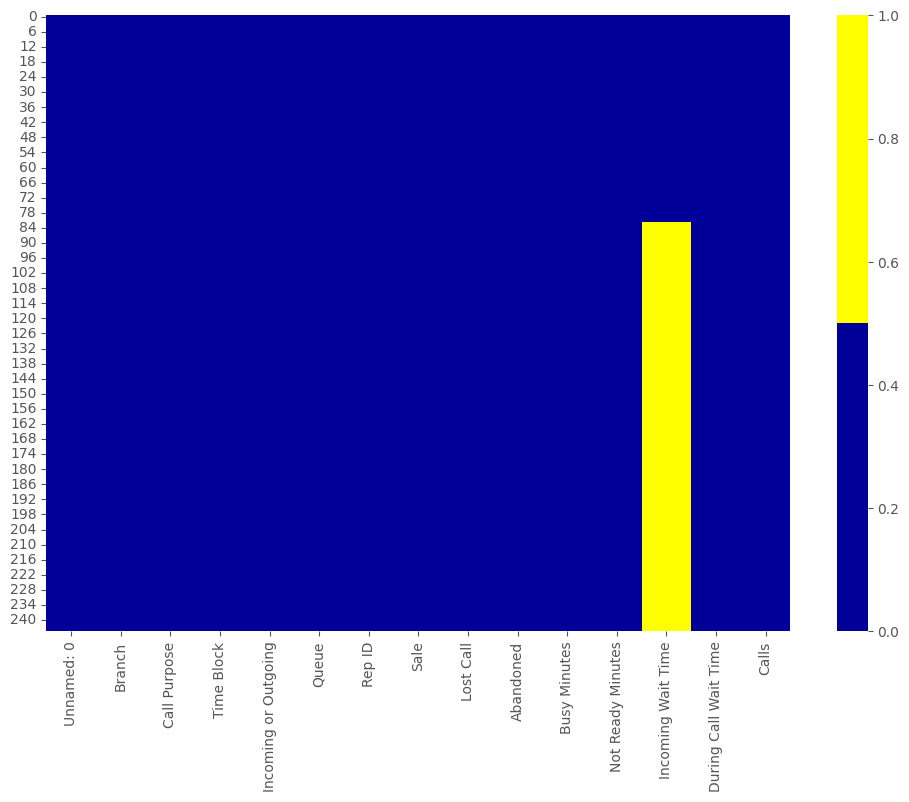

In [280]:
# Question 1 solution below
# Code Used
# Add Additional Cells as needed.

cols = north_df.columns[:15] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(north_df[cols].isnull(), cmap=sns.color_palette(colours))
print(north_df.shape)

In [281]:
for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    print(north_df.shape)

Unnamed: 0 - 0%
(245, 15)
Branch - 0%
(245, 15)
Call Purpose - 0%
(245, 15)
Time Block - 0%
(245, 15)
Incoming or Outgoing - 0%
(245, 15)
Queue - 0%
(245, 15)
Rep ID - 0%
(245, 15)
Sale - 0%
(245, 15)
Lost Call - 0%
(245, 15)
Abandoned - 0%
(245, 15)
Busy Minutes - 0%
(245, 15)
Not Ready Minutes - 0%
(245, 15)
Incoming Wait Time - 67%
(245, 15)
During Call Wait Time - 0%
(245, 15)
Calls - 0%
(245, 15)


In [282]:
south_df['Sale'].isnull().value_counts()

Sale
False    314
Name: count, dtype: int64

In [283]:
south_df['Incoming Wait Time'].isnull().sum()

np.int64(188)

<Axes: >

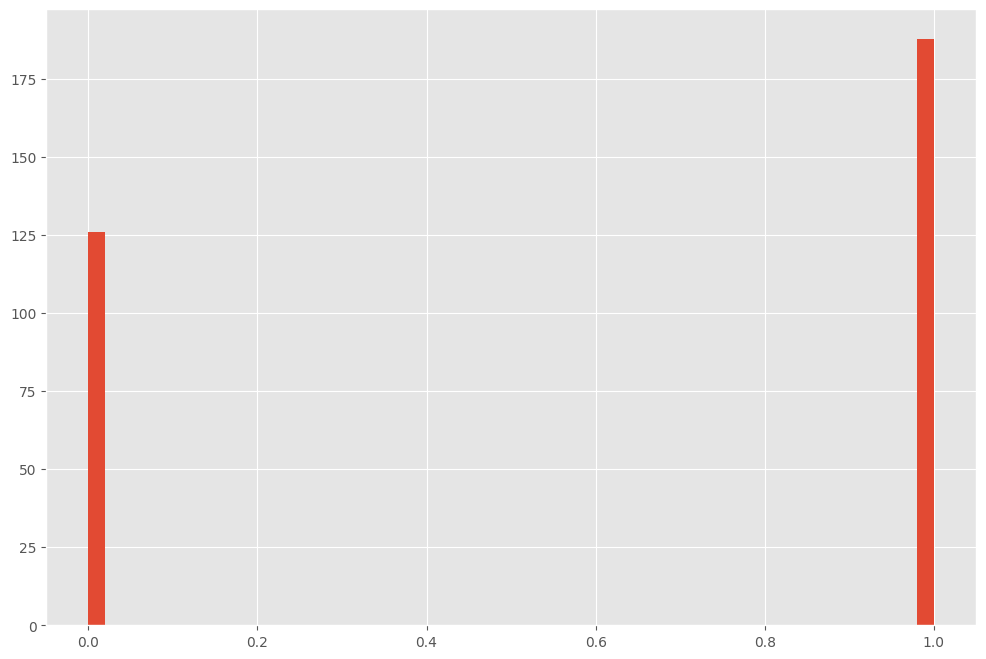

In [284]:
missing_by_row = south_df.isna().sum(axis='columns')
missing_by_row.hist(bins=50)

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

##### Record your answer by below:
> Your Answer: 

In [285]:
#Code Used
# Add Additional Cells as needed.


north_df['Sale'].value_counts()

Sale
NO      234
YES      10
YES       1
Name: count, dtype: int64

In [286]:
north_df=north_df.replace({'Sale':{'NO':False,'YES':True}})

north_df['Sale'].value_counts()

Sale
False    234
True      10
YES        1
Name: count, dtype: int64

In [287]:
south_df=south_df.replace({'Sale':{'NO':False,'YES':True}})

south_df['Sale'].value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_15684\3934300982.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  south_df=south_df.replace({'Sale':{'NO':False,'YES':True}})


Sale
False    308
True       6
Name: count, dtype: int64

In [288]:
north_dfre = north_df['Incoming Wait Time'].fillna(north_df['Incoming Wait Time'].mean(),inplace = True)

# north_dfre.value_counts()

north_df['Incoming Wait Time'].value_counts()

Incoming Wait Time
3.04878    163
4.00000     20
5.00000     17
1.00000     17
2.00000     16
3.00000     12
Name: count, dtype: int64

In [289]:
south_dfre=south_df['Incoming Wait Time'].fillna(south_df['Incoming Wait Time'].mean(),inplace=True)

south_df['Incoming Wait Time'].value_counts()

# south_dfre.value_counts()

Incoming Wait Time
3.0    217
4.0     30
2.0     28
1.0     20
5.0     19
Name: count, dtype: int64

(245, 15)


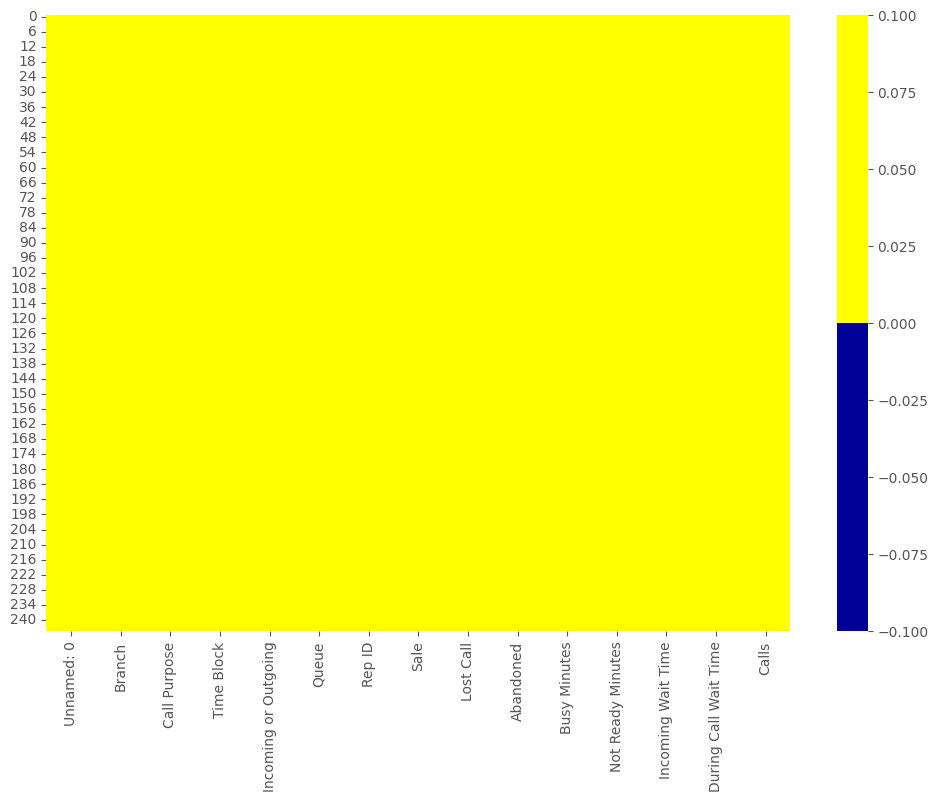

In [290]:
cols = north_df.columns[:15] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(north_df[cols].isnull(), cmap=sns.color_palette(colours))
print(north_df.shape)

(314, 15)


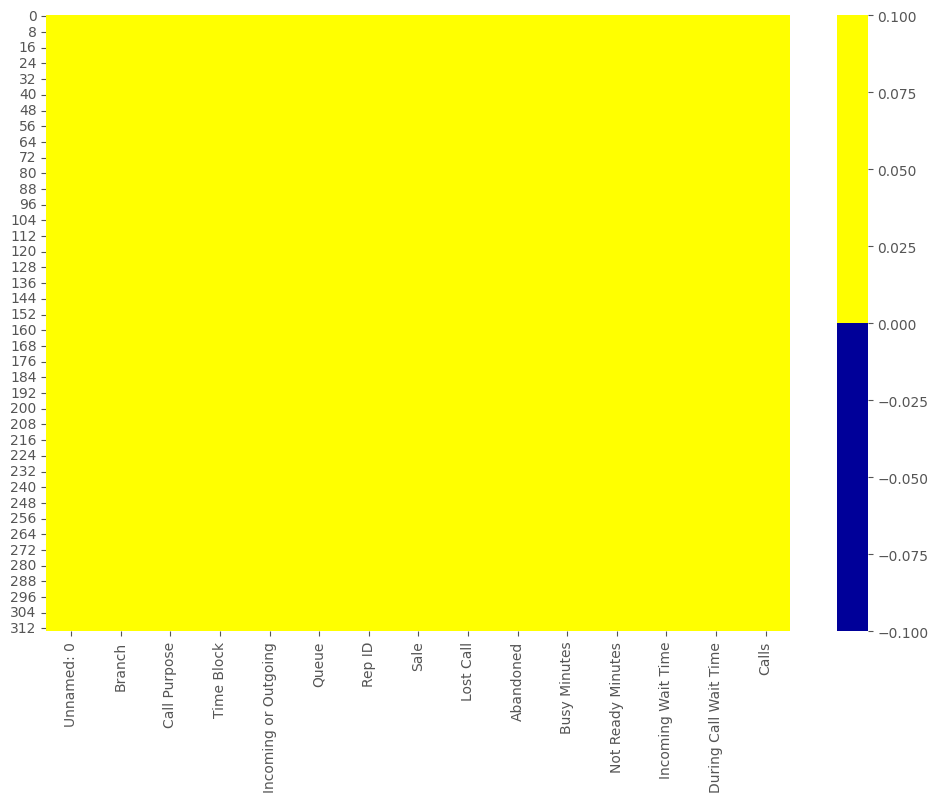

In [291]:
cols = south_df.columns[:15] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(south_df[cols].isnull(), cmap=sns.color_palette(colours))
print(south_df.shape)

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [292]:
# Cleaning Question 3 solution below:

##### Record your answer below:
> Your Answer: 

In [293]:
#Code Used
# Add Additional Cells as needed.

north_duplicate=north_df[north_df.duplicated()]
 
north_duplicate

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


In [294]:
south_duplicate=south_df[south_df.duplicated()]

south_duplicate

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [295]:
# Cleaning Question 4 solution below:

##### Record your answer below:
> Your Answer: 

In [296]:
#Code Used
# Add Additional Cells as needed.
north_df = north_df.drop('Unnamed: 0', axis=1)
south_df = south_df.drop('Unnamed: 0', axis=1)

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [297]:
# Create dataframe for the entire company named df

df=pd.concat([north_df,south_df])

df.columns
df['Call Purpose'].value_counts()

Call Purpose
Product Support    310
Sales Support      198
Complaint           51
Name: count, dtype: int64

In [298]:
df = df.drop(columns=["Unnamed: 0"], errors="ignore")
north_df

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,False,0,1,9,2,1.00000,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,False,0,0,11,1,1.00000,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,False,0,0,9,3,1.00000,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,False,0,0,11,2,1.00000,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,False,0,0,8,2,1.00000,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,North,Product Support,5:00 PM,Outgoing,B,Brent,False,0,0,10,2,3.04878,3,1
241,North,Product Support,5:00 PM,Outgoing,A,Joe,False,0,0,8,3,3.04878,2,1
242,North,Product Support,5:00 PM,Outgoing,A,Amanda,False,0,0,12,1,3.04878,2,1
243,North,Product Support,5:00 PM,Outgoing,A,Cam,False,0,0,11,2,3.04878,2,1


In [299]:
south_df

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,False,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,False,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,False,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,False,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,False,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,South,Product Support,5:00 PM,Outgoing,D,Helga,False,0,0,10,3,3.0,4,1
310,South,Product Support,5:00 PM,Outgoing,C,Susan,False,0,0,12,3,3.0,4,1
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,False,0,0,9,3,3.0,4,1
312,South,Product Support,5:00 PM,Outgoing,C,Eric,False,0,0,10,1,3.0,2,1


In [300]:
north_df['Incoming Wait Time'] = north_df['Incoming Wait Time'].fillna(
    north_df['Incoming Wait Time'].mean()
)

south_df['Incoming Wait Time'] = south_df['Incoming Wait Time'].fillna(
    south_df['Incoming Wait Time'].mean()
)

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [301]:
# Manipulation Question solution below:
north_rep_calls = (
    north_df.groupby("Rep ID")["Calls"]
    .sum()
    .sort_values(ascending=False)
)

south_rep_calls = (
    south_df.groupby("Rep ID")["Calls"]
    .sum()
    .sort_values(ascending=False)
)

north_rep_calls.head(1)
south_rep_calls.head(1)

display(north_rep_calls.head(1))
display(south_rep_calls.head(1))

Rep ID
Brent    37
Name: Calls, dtype: int64

Rep ID
Eric    35
Name: Calls, dtype: int64

##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent 37
- South Branch = Eric 35

In [302]:
df_grpid = df.groupby(['Branch', 'Rep ID']).sum(numeric_only=True)
df_grpid


Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
Branch Rep ID                                                          
North  Amanda          0          1           229                 43   
       Andy            0          3           228                 43   
       Brent           0          1           362                 71   
       Cam             1          0           233                 46   
       Duke            2          0           292                 56   
       Joe             0          0           256                 49   
       Lilly           0          2           307                 59   
       Todd            1          0           296                 58   
       Xander          1          0           244                 44   
South  Alice           0          0           199                 46   
       Eric            0          0           361                 54   
       George          0          0           298                 53   
       Helga           0          2           292                 58   
       Josh            3          0           260                 50   
       Karl            1          0           287                 61   
       Kate            0          0           291                 61   
       Randy           3          1           320                 66   
       Sandy           1          0           325                 60   
       Sharon          1          1           257                 38   
       Susan           2          0           267                 53   

               Incoming Wait Time  During Call Wait Time  Calls  
Branch Rep ID                                                    
North  Amanda           66.878049                     60     23  
       Andy             75.634146                     65     23  
       Brent           105.414634                    117     37  
       Cam              71.634146                     66     24  
       Duke             84.731707                     85     29  
       Joe              84.780488                     81     26  
       Lilly            91.878049                     88     30  
       Todd             91.121951                     97     29  
       Xander           74.878049                     68     24  
South  Alice            57.000000                     58     20  
       Eric             98.000000                    112     35  
       George           89.000000                     87     29  
       Helga            96.000000                     95     31  
       Josh             82.000000                     83     26  
       Karl             83.000000                     85     28  
       Kate             91.000000                     83     29  
       Randy            98.000000                     98     33  
       Sandy            91.000000                    100     32  
       Sharon           80.000000                     77     25  
       Susan            77.000000                     88     26

In [303]:
sort_df=df_grpid.sort_values(by=['Calls'],ascending=False)

sort_df

Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
Branch Rep ID                                                          
North  Brent           0          1           362                 71   
South  Eric            0          0           361                 54   
       Randy           3          1           320                 66   
       Sandy           1          0           325                 60   
       Helga           0          2           292                 58   
North  Lilly           0          2           307                 59   
       Todd            1          0           296                 58   
South  George          0          0           298                 53   
       Kate            0          0           291                 61   
North  Duke            2          0           292                 56   
South  Karl            1          0           287                 61   
North  Joe             0          0           256                 49   
South  Susan           2          0           267                 53   
       Josh            3          0           260                 50   
       Sharon          1          1           257                 38   
North  Cam             1          0           233                 46   
       Xander          1          0           244                 44   
       Andy            0          3           228                 43   
       Amanda          0          1           229                 43   
South  Alice           0          0           199                 46   

               Incoming Wait Time  During Call Wait Time  Calls  
Branch Rep ID                                                    
North  Brent           105.414634                    117     37  
South  Eric             98.000000                    112     35  
       Randy            98.000000                     98     33  
       Sandy            91.000000                    100     32  
       Helga            96.000000                     95     31  
North  Lilly            91.878049                     88     30  
       Todd             91.121951                     97     29  
South  George           89.000000                     87     29  
       Kate             91.000000                     83     29  
North  Duke             84.731707                     85     29  
South  Karl             83.000000                     85     28  
North  Joe              84.780488                     81     26  
South  Susan            77.000000                     88     26  
       Josh             82.000000                     83     26  
       Sharon           80.000000                     77     25  
North  Cam              71.634146                     66     24  
       Xander           74.878049                     68     24  
       Andy             75.634146                     65     23  
       Amanda           66.878049                     60     23  
South  Alice            57.000000                     58     20

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [304]:
# Manipulation Question 2 solution below:

# Code Used
# Add Additional Cells as needed.

df_grpby=df.groupby('Branch')

e = ((df_grpby['Abandoned'].sum()/df_grpby['Calls'].sum())*100).round(2)

print('North and South Abandoned percentage is',e)


North and South Abandoned percentage is Branch
North    2.86
South    1.27
dtype: float64


In [305]:
t= ((df['Abandoned'].sum()/df['Calls'].sum())*100).round(2)

print('Overall percentage is',t)

Overall percentage is 1.97


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86
- South Branch = 1.27
- Company Wide = 1.97
- Do any of these fall out of the optimal range of 2-5%?

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [306]:
# Manipulation Question 3 solution below:
n=north_df[north_df['Incoming Wait Time']<=2]['Incoming Wait Time']

n_no_calls_answered_in_2_secs=n.value_counts().sum()

n_total_incoming_calls= north_df[north_df['Incoming or Outgoing'] == 'Incoming']['Incoming or Outgoing'].value_counts().sum()


pct_calls_2secs=  ((n_no_calls_answered_in_2_secs/n_total_incoming_calls)*100).round(2)
print('no of calls answered in 2 secs for n',n_no_calls_answered_in_2_secs)

print('percentage calls answered in 2 secs for north:', pct_calls_2secs)

no of calls answered in 2 secs for n 33
percentage calls answered in 2 secs for north: 40.24


In [307]:
s=south_df[south_df['Incoming Wait Time']<=2]['Incoming Wait Time']

s_no_calls_answered_in_2_secs=s.value_counts().sum()

s_total_incoming_calls= south_df[south_df['Incoming or Outgoing'] == 'Incoming']['Incoming or Outgoing'].value_counts().sum()


pct_calls_2secs=  ((s_no_calls_answered_in_2_secs/s_total_incoming_calls)*100).round(2)

print('no of calls answered in 2 secs for s',s_no_calls_answered_in_2_secs)
print('percentage calls answered in 2 secs for south:', pct_calls_2secs)

no of calls answered in 2 secs for s 48
percentage calls answered in 2 secs for south: 38.1


In [308]:
total_calls_answered_2_secs= s_no_calls_answered_in_2_secs+n_no_calls_answered_in_2_secs

total_calls_answered_2_secs

total_incoming_calls= s_total_incoming_calls+n_total_incoming_calls

total_incoming_calls

pct_calls_2secs =  ((total_calls_answered_2_secs/total_incoming_calls)*100).round(2)

print('no of calls answered in 2 secs for total',total_calls_answered_2_secs)
print('percentage calls answered in 2 secs for total:', pct_calls_2secs)

no of calls answered in 2 secs for total 81
percentage calls answered in 2 secs for total: 38.94


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24vcalls
- South Branch = 38.1 calls
- Company Wide = 38.94

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [309]:
# Manipulation Question 4 solution below:

In [310]:
# Code Used 
n= north_df['Incoming Wait Time'].agg('mean')
n

np.float64(3.048780487804877)

In [311]:
south_df['Incoming Wait Time'].agg('mean')

np.float64(3.0)

In [312]:
df['Incoming Wait Time'].agg('mean')

np.float64(3.0213796413456087)

##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.04 
- South Branch in seconds =3.0
- Company Wide in seconds = 3.02

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

In [313]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import matplotlib.pyplot as plt


In [314]:
queue_dict = df.groupby("Queue").sum(numeric_only=True)
queue_dict



,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Queue,,,,,,,
A,1,4,946,181,298.926829,272,96
B,4,3,1501,288,448.024390,455,149
C,4,1,1409,251,403.000000,435,138
D,7,3,1748,349,539.000000,531,176


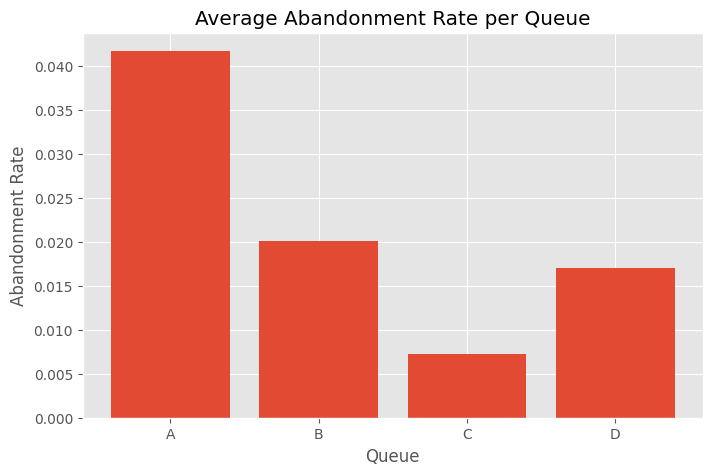

In [315]:
abandonment_rate = queue_dict["Abandoned"] / queue_dict["Calls"]
abandonment_rate
plt.figure(figsize=(8,5))
plt.bar(abandonment_rate.index, abandonment_rate.values)
plt.title("Average Abandonment Rate per Queue")
plt.xlabel("Queue")
plt.ylabel("Abandonment Rate")
plt.show()


##### Record your answer below:

> Chart style you chose and why: 

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

In [316]:
north = df[df['Branch'] == 'North']

In [317]:
avg_speed = north.groupby("Rep ID")["Incoming Wait Time"].mean()
avg_speed = avg_speed.round(2)  # round to 2 decimals
avg_speed

Rep ID
Amanda    2.91
Andy      3.29
Brent     2.85
Cam       2.98
Duke      2.92
Joe       3.26
Lilly     3.06
Todd      3.14
Xander    3.12
Name: Incoming Wait Time, dtype: float64

In [318]:
# Only incoming calls
incoming_calls = north[north["Incoming or Outgoing"] == "Incoming"]

# Calls answered within 2 seconds
quick_calls = incoming_calls[incoming_calls["Incoming Wait Time"] <= 2]

# Sum calls per rep
total_calls = incoming_calls.groupby("Rep ID")["Calls"].sum()
quick_calls_count = quick_calls.groupby("Rep ID")["Calls"].sum()

# Service level percentage
service_level = (quick_calls_count / total_calls * 100).round(2)
service_level

Rep ID
Amanda    60.00
Andy      30.00
Brent     75.00
Cam       45.45
Duke      42.86
Joe       20.00
Lilly     33.33
Todd      33.33
Xander    33.33
Name: Calls, dtype: float64

In [319]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table
# print(quick_stats)

# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  
# print(total_stats)
#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

service_level["Service Level %"].mean()

np.float64(41.479076479076475)

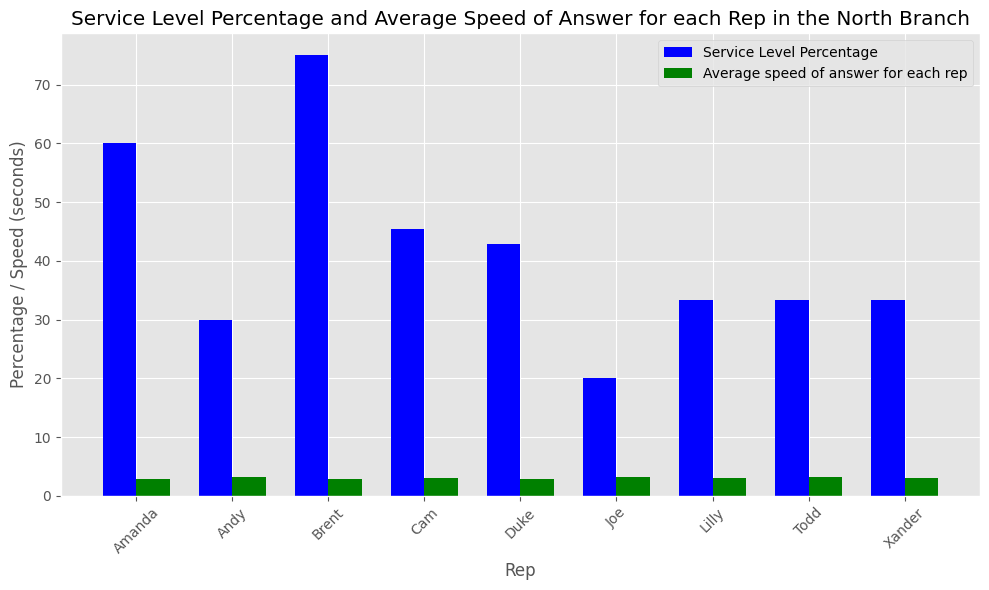

In [320]:
grouped_data=pd.merge(north_plt,service_level,on='Rep ID')

# grouped_data['Rep ID']



bar_positions = list(range(len(grouped_data)))

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35

# Plotting Service Level Percentage
ax.bar(
    bar_positions,
    grouped_data['Service Level %'],
    bar_width,
    label='Service Level Percentage',
    color='b'
)

# Plotting Average Speed Of Answer
ax.bar(
    [pos + bar_width for pos in bar_positions],
    grouped_data['Incoming Wait Time'],
    bar_width,
    label='Average speed of answer for each rep',
    color='g'
)

ax.set_xticks([pos + bar_width / 2 for pos in bar_positions])
ax.set_xticklabels(grouped_data['Rep ID'])
ax.set_xlabel('Rep')
ax.set_ylabel('Percentage / Speed (seconds)')
ax.set_title('Service Level Percentage and Average Speed of Answer for each Rep in the North Branch')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Record your answer below:

> Chart style you chose and why: 

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

In [326]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
# complaints.keys()


Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: count, dtype: int64


##### Record your answer below:

> Chart style you chose and why: 

In [ ]:
#Pie charts — chosen because they clearly show the proportion of incoming versus outgoing calls for each call purpose.

In [327]:
# Function to plot a pie chart for a single call purpose
def plot_pie_chart(di,call_purpose):
    # Get the data for the specific call purpose
    title=call_purpose
    
    # Create the pie chart
    plt.figure()
    plt.pie(di.values(), labels=di.keys(), autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.axis('equal')

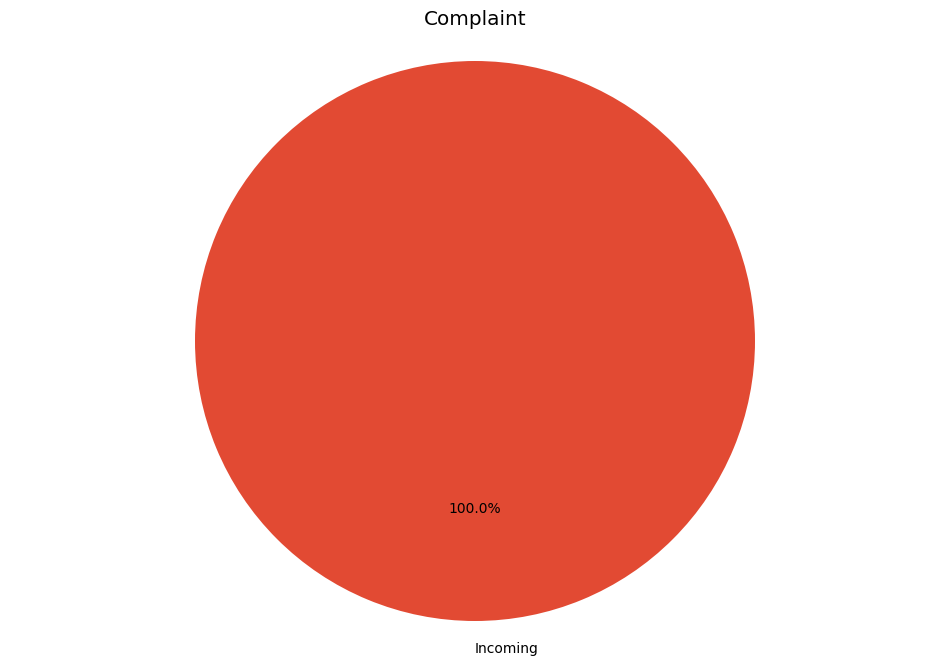

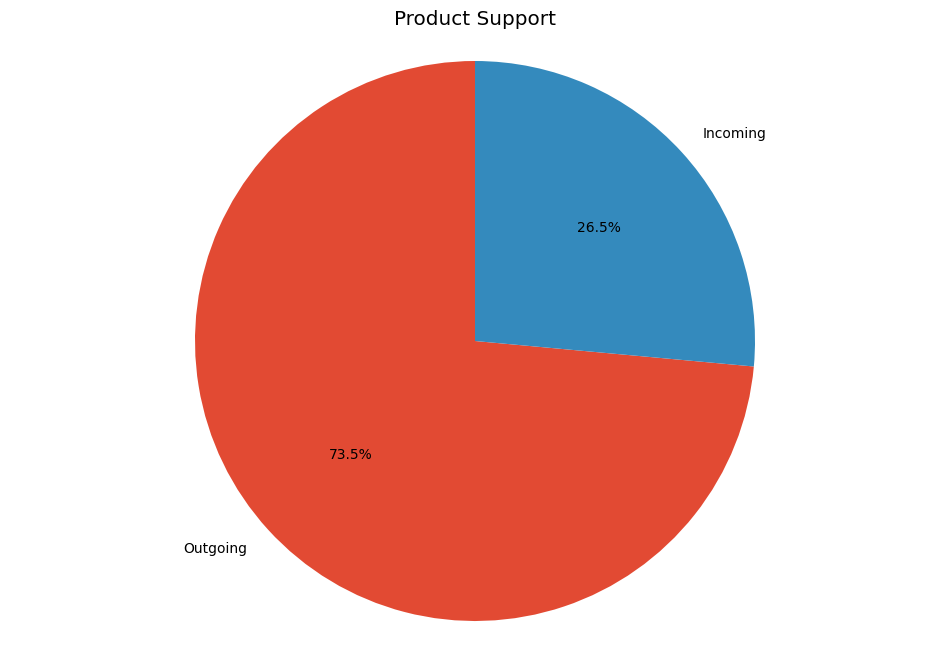

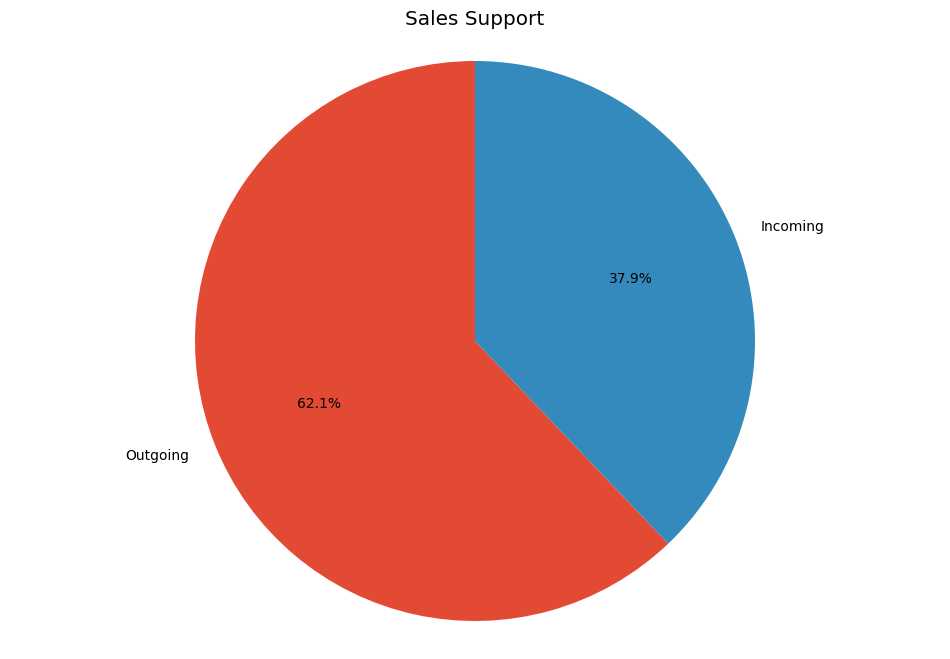

In [ ]:
# Function to plot a pie chart for a single call purpose
def plot_pie_chart(di,call_purpose):
    # Get the data for the specific call purpose
    title=call_purpose
    
    # Create the pie chart
    plt.figure()
    plt.pie(di.values(), labels=di.keys(), autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.axis('equal')

# Loop through each call purpose dictionary and plot a pie chart for each
for call_purpose in call_purposes:
    if call_purpose == 'Product Support':
        plot_pie_chart(product_support, call_purpose)
    elif call_purpose == 'Sales Support':
        plot_pie_chart(sales_support, call_purpose)
    elif call_purpose == 'Complaint':
        plot_pie_chart(complaints, call_purpose)

plt.show()

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


In [334]:
south_plt = south_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
south_plt
# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = south_df[south_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# # Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = south_df[south_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

# #  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# # Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
service_level["Service Level %"].mean()

np.float64(36.198965176237905)

#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: 



Average_abandonment rate: when we look at the visualization it is clear that queue A and queue B bars (north branch Queues) are higher than the queue C and queue D (south branch Queues) north_df > south_df

Average service level percentage: north_df = 41.47907647907647 south_df= 36.198965176237905

Average speed of answer: North Branch in seconds = 3.04 South Branch in seconds = 3.0

From the above KPIs it is clear eventhough the abandonment rate is higher in the north branch the service is good in the north when compared to the south branch.

#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: 


Your Answer: Number of reps in the south branch is higher than the north branch. Eventhough the service is good in the north branch the average abandonment rate is too high. We cannot predict the sevice accuratly without taking the abandonment rate into account. I hope North branch would benefit from the extra help.

#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: 


Yes, we could have done analysis better if there was an accurate 'Incoming Wait Time' values instead of many null values which we imputed by mean.

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

Bar chart was chosen to compare call volumes across different time blocks and call purposes, making trends and peak periods easy to identify.

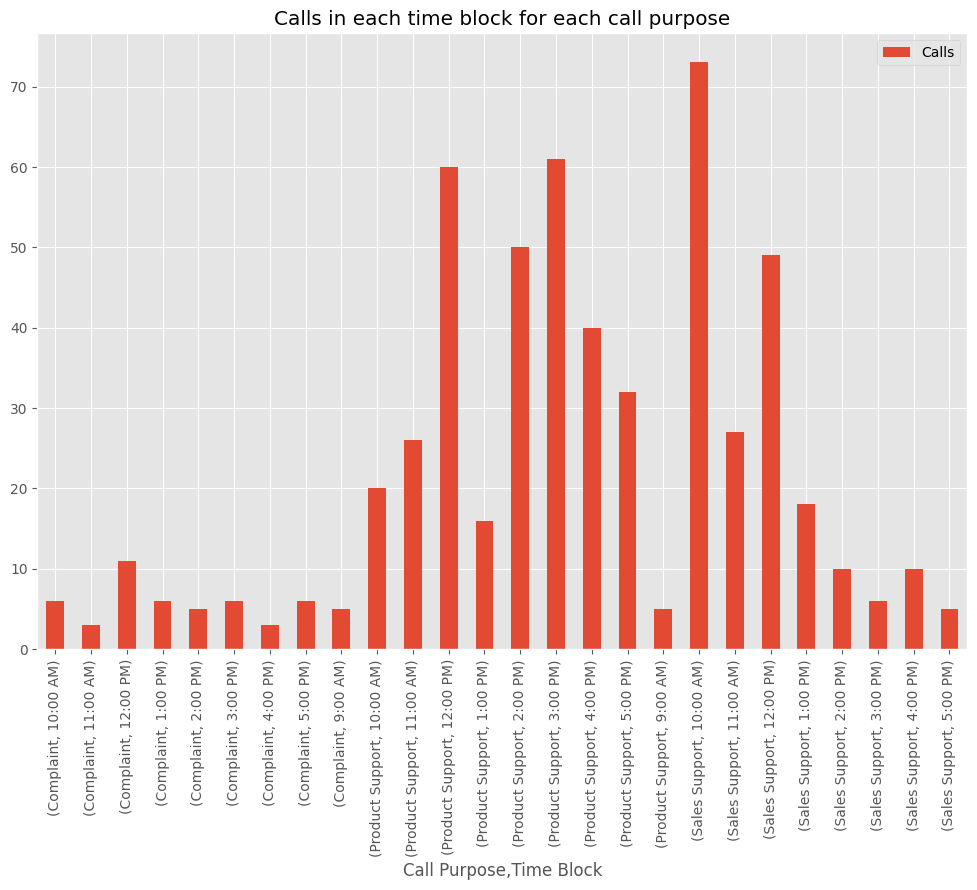

In [340]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:
grouped_call_times = call_times.groupby(["Call Purpose",'Time Block']).sum()
grouped_call_times.plot.bar()
plt.title('Calls in each time block for each call purpose')



plt.show()

<Axes: title={'center': 'Complaint Calls by Time Block'}, xlabel='Time Block'>

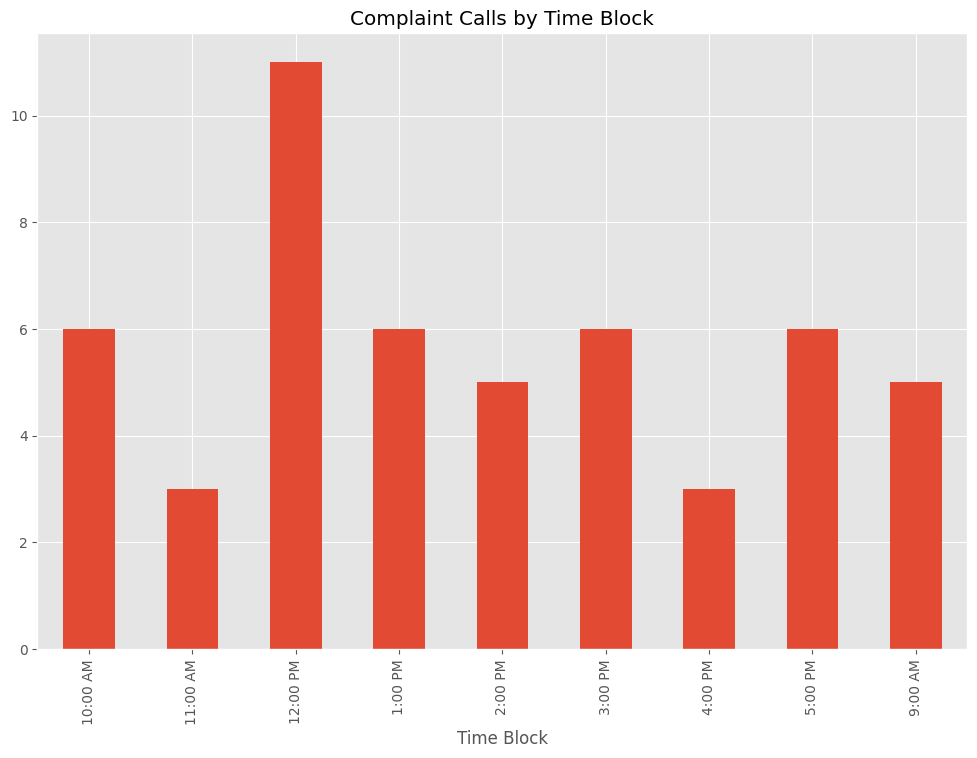

In [342]:
# Use groupby and get_group to select which call purpose to plot:
grouped = call_times.groupby("Call Purpose")

grouped.get_group("Complaint") \
    .groupby("Time Block")["Calls"] \
    .sum() \
    .plot(kind="bar", title="Complaint Calls by Time Block")

In [ ]:
The End...